# Respiratory Illness Classification and Diagnostic Assistance using a RAG Pipeline

This notebook documents the process of building a diagnostic assistant for respiratory illnesses.
We start with data exploration, move to preparation, build baseline models, and finally prepare
for a Retrieval-Augmented Generation (RAG) system.



### Imports and Setup

In [7]:
# Core Python Libraries
import numpy as np
import pandas as pd
from scipy import stats

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine Learning (Classical & Ensemble)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Deep Learning
import tensorflow as tf
from tensorflow import keras

# Natural Language Processing 
import nltk
import gensim


### Data Understanding

We use patient-level data from the Albuquerque Public Health Department (~37,000 records).  
Columns include:

- **Symptoms** (text)  
- **Age** (numeric)  
- **Sex** (categorical)  
- **Disease** (target label)  
- **Treatment** (text)  
- **Nature** (categorical, e.g., high, medium, low)  

Our first step is to load the data and inspect its structure.


#### Load The Data

In [8]:
File = 'data/respiratory symptoms and treatment.csv'
df = pd.read_csv(File)

#### Basic Overview of The DataSet

In [ ]:
# Data Set Shape
print("\n--- Dataset Shape ---")
print(df.shape)  


--- Dataset Shape ---
(38537, 6)


In [11]:
# First 5 Rows
print("\n--- First 5 Rows ---")
print(df.head())


--- First 5 Rows ---
                     Symptoms  Age     Sex Disease    Treatment Nature
0                   coughing   5.0  female  Asthma   Omalizumab   high
1  tight feeling in the chest  4.0  female  Asthma  Mepolizumab   high
2                    wheezing  6.0    male  Asthma  Mepolizumab   high
3         shortness of breath  7.0    male  Asthma  Mepolizumab   high
4         shortness of breath  9.0    male  Asthma  Mepolizumab   high


In [12]:
# Column Info
print("\n--- Column Info ---")
print(df.info())


--- Column Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38537 entries, 0 to 38536
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Symptoms   37841 non-null  object 
 1   Age        38195 non-null  float64
 2   Sex        37615 non-null  object 
 3   Disease    38197 non-null  object 
 4   Treatment  35696 non-null  object 
 5   Nature     36347 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.8+ MB
None


In [13]:
# Missing Values
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Missing Values ---
Symptoms      696
Age           342
Sex           922
Disease       340
Treatment    2841
Nature       2190
dtype: int64


In [14]:
# Basic Stats
print("\n--- Basic Stats ---")
print(df.describe(include="all").T)


--- Basic Stats ---
             count unique                  top   freq       mean        std  \
Symptoms     37841     92  shortness of breath   3005        NaN        NaN   
Age        38195.0    NaN                  NaN    NaN  36.997356  27.713575   
Sex          37615      3                 male  21256        NaN        NaN   
Disease      38197     18            Pneumonia   6144        NaN        NaN   
Treatment    35696     33          antibiotics   5135        NaN        NaN   
Nature       36347      4                 high  22637        NaN        NaN   

           min   25%   50%   75%   max  
Symptoms   NaN   NaN   NaN   NaN   NaN  
Age        1.0  12.0  30.0  63.0  98.0  
Sex        NaN   NaN   NaN   NaN   NaN  
Disease    NaN   NaN   NaN   NaN   NaN  
Treatment  NaN   NaN   NaN   NaN   NaN  
Nature     NaN   NaN   NaN   NaN   NaN  


#### Data Types and Uniques Values

In [16]:
# Data Types and Uniques Values
print("\n--- Data Types ---")
print(df.dtypes)



--- Data Types ---
Symptoms      object
Age          float64
Sex           object
Disease       object
Treatment     object
Nature        object
dtype: object


In [17]:
# Unique Values per Column
print("\n--- Unique Values per Column ---")
print(df.nunique())


--- Unique Values per Column ---
Symptoms     92
Age          83
Sex           3
Disease      18
Treatment    33
Nature        4
dtype: int64


#### Distribution Of Numeric Features

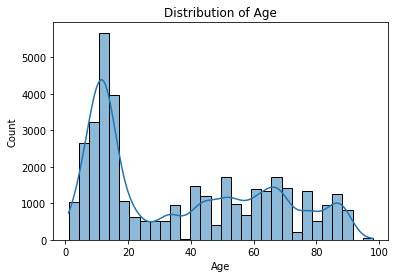

In [26]:
num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

#### Categorical Feature Counts

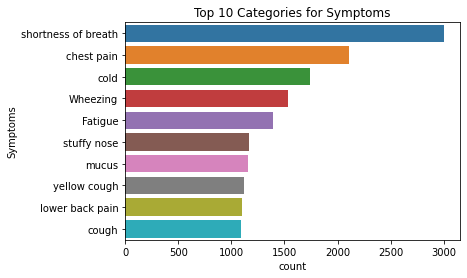

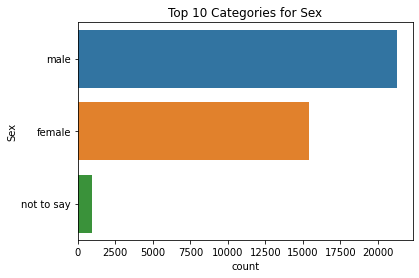

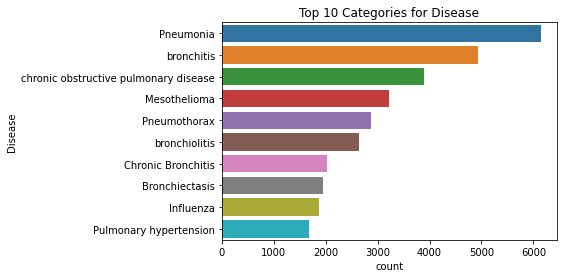

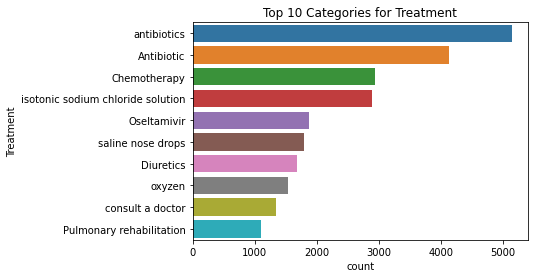

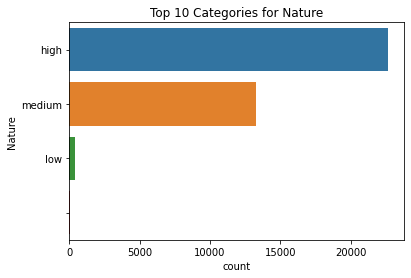

In [31]:
cat_cols = df.select_dtypes(include="object").columns

for col in cat_cols:
    plt.figure(figsize=(6, 4))
     # Get top 10 categories
    top_10 = df[col].value_counts().index[:10]
    sns.countplot(y=col, data=df[df[col].isin(top_10)], order=top_10)
    plt.title(f"Top 10 Categories for {col}")
    plt.show()